# Data Preparation

"Predicting Stock Prices" adalah sebuah proyek analisis data yang bertujuan untuk melakukan prediksi harga saham menggunakan eksperimen berbagai metode time series forecasting analysis, seperti ARIMA, FBprophet, Holtwinter, dan metode-metode lainnya. Dataset yang digunakan dalam proyek ini mencakup dua variabel utama, yaitu "Date" yang merepresentasikan tanggal penutupan, dan "Close" yang mencerminkan harga saham pada saat penutupan.

Proses analisis dimulai dengan eksplorasi data, di mana kita melihat dan memahami karakteristik dari dataset, termasuk tren dan pola yang mungkin ada dalam harga saham. Setelah itu, kita akan memproses data dengan menyusun informasi tanggal dan harga penutupan untuk digunakan dalam pembangunan model.

Berbagai metode time series forecasting analysis akan dieksplorasi dan diuji dalam memprediksi harga saham. Setiap metode akan dievaluasi dengan menggunakan metrik bisnis seperti "Mean Absolute Error (MAE)" untuk mengukur sejauh mana model dapat memprediksi harga saham yang mendekati nilai sebenarnya.

Dengan memanfaatkan MAE sebagai metrik evaluasi, proyek ini akan memberikan pemahaman yang mendalam tentang seberapa baik setiap metode forecasting dapat digunakan untuk prediksi harga saham. Semakin kecil nilai MAE, semakin baik model dalam memberikan perkiraan harga yang akurat.

Dengan penekanan pada metrik bisnis, proyek ini dapat memberikan pandangan yang lebih holistik dan informatif tentang kinerja berbagai metode forecasting dalam konteks prediksi harga saham. Informasi ini dapat memberikan nilai tambah bagi investor, analis keuangan, dan pelaku pasar untuk membuat keputusan investasi yang lebih cerdas dan informasional di pasar saham.

# Importasi Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Data Collection

* Mengambil data dari yahoo finance pada tanggal 1/3/2012 - 12/23/2013

In [2]:
df = pd.read_csv('data/stock_prediction.csv')

In [3]:
df

,Date,Close
0,1/3/2012,60.330002
1,1/4/2012,59.709999
2,1/5/2012,59.419998
3,1/6/2012,59.000000
4,1/9/2012,59.180000
...,...,...
496,12/23/2013,77.870003
497,12/24/2013,78.010002
498,12/26/2013,78.389999
499,12/27/2013,78.470001


## Data Definition

Data terdiri dari dua kolom antara lain :
* `Date` : Merupakan tanggal saham diperdagangkan
* `Close` : Merupakan harga saham saat jam bursa tutup

## Data Validation

Mengecek tipe data apakah sudah sesuai dengan fitur dalam proses analisa

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    501 non-null    object 
 1   Close   501 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB


### Check Nilai Null

In [5]:
#Menghitung nilai null pada kolom
df.isnull().sum()

Date     0
Close    0
dtype: int64

### Melihat statistik deskriptif dan Range Data Numerikal

In [6]:
#Melihat statistika deskriptif dengan describe()
df.describe()

,Close
count,501.000000
mean,71.269182
std,6.298548
min,57.360001
25%,68.300003
50%,73.099998
75%,75.900002
max,81.209999


### Melihat Dimensi Data

In [7]:
df.shape

(501, 2)

## Spliting Data

In [8]:
# Split the data into training and testing sets (70:30)
train_ratio = 0.80
split_index = int(len(df) * train_ratio)

train = df.iloc[:split_index]
test = df.iloc[split_index:]

# Print the number of samples in each set
print("Number of samples in the training set:", len(train))
print("Number of samples in the testing set:", len(test))

Number of samples in the training set: 400
Number of samples in the testing set: 101


In [9]:
train

,Date,Close
0,1/3/2012,60.330002
1,1/4/2012,59.709999
2,1/5/2012,59.419998
3,1/6/2012,59.000000
4,1/9/2012,59.180000
...,...,...
395,7/31/2013,77.940002
396,8/1/2013,78.220001
397,8/2/2013,78.750000
398,8/5/2013,78.769997


In [10]:
test

,Date,Close
400,8/7/2013,77.370003
401,8/8/2013,77.250000
402,8/9/2013,76.900002
403,8/12/2013,77.080002
404,8/13/2013,76.860001
...,...,...
496,12/23/2013,77.870003
497,12/24/2013,78.010002
498,12/26/2013,78.389999
499,12/27/2013,78.470001


## Melakukan Plotting Data Awal

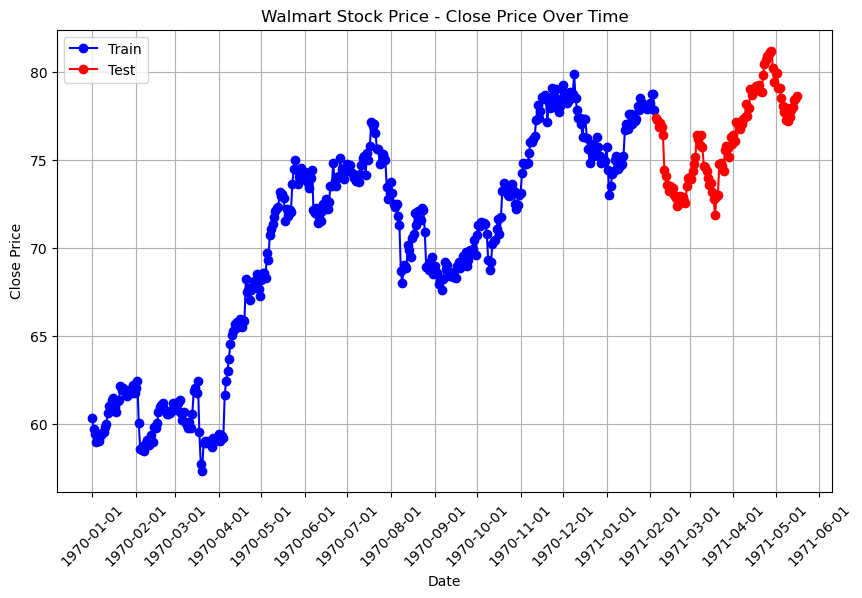

In [11]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot data latihan (train)
plt.plot(train['Date'], train['Close'], label='Train', marker='o', color='blue')

# Plot data uji (test)
plt.plot(test['Date'], test['Close'], label='Test', marker='o', color='red')

# Menambahkan judul dan label sumbu
plt.title('Walmart Stock Price - Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Menambahkan grid
plt.grid(True)

# Menampilkan legenda
plt.legend()

# Menambahkan rotasi pada label tanggal untuk menghindari tumpukan
plt.xticks(rotation=45)

# Menetapkan format dan interval label tanggal
date_format = DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(MonthLocator(interval=1))  # Ubah interval sesuai kebutuhan

# Menampilkan plot
plt.show()


## EDA

### Cek Statinaritas Data

Sebuah time series dikatakan stationer jika propertinya tidak berubah secara statistik sepanjang waktu. Dalam konteks cek stationeritas pada data time series, kita ingin memastikan bahwa sifat statistik dari data tetap konsisten sepanjang waktu. Mengecek stationeritas penting karena banyak metode analisis time series, seperti ARIMA, membutuhkan data yang stationer atau setidaknya dapat diubah menjadi stationer melalui differencing atau transformasi lainnya

In [12]:
# Periksa Stationeritas
def test_stationarity(timeseries):
    # Lakukan uji Dickey-Fuller:
    result = adfuller(timeseries)
    print('Statistik ADF:', result[0])
    print('Nilai p:', result[1])
    print('Nilai Kritis:', result[4])
    
    if result[1] <= 0.05:
        print("Stasioner (Nilai p <= 0.05)")
    else:
        print("Non-Stasioner (Nilai p > 0.05)")


In [13]:
# Menguji stationerity dengan fungsi diatas
test_stationarity(train['Close'])

Statistik ADF: -1.2247365692884224
Nilai p: 0.662865186742714
Nilai Kritis: {'1%': -3.446845912589748, '5%': -2.8688110853002007, '10%': -2.5706432834592747}
Non-Stasioner (Nilai p > 0.05)


data tidak stationer ditandai dengan p-value lebih besar dari 0.05 atau alpha

## Statistik Deskriptif

C:\Users\hp\AppData\Local\Temp\ipykernel_20004\2999383309.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Date'] = pd.to_datetime(train['Date'])


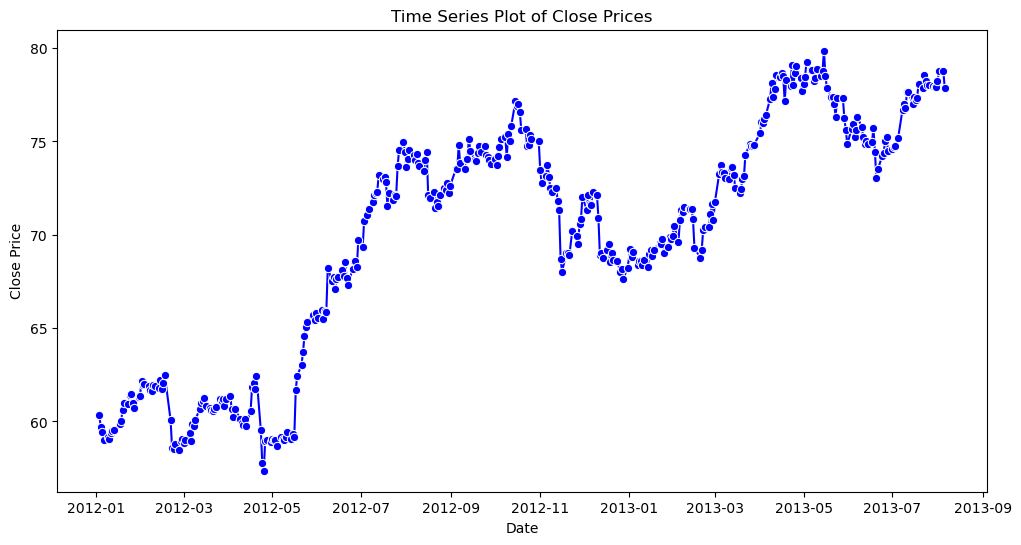

count    400.000000
mean      69.990450
std        6.325296
min       57.360001
25%       65.249998
50%       71.700001
75%       74.812498
max       79.860001
Name: Close, dtype: float64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengecek tipe data kolom 'Date' dan mengubahnya menjadi datetime jika belum
if not pd.api.types.is_datetime64_any_dtype(train['Date']):
    train['Date'] = pd.to_datetime(train['Date'])

# Plot time series data
plt.figure(figsize=(12, 6))
sns.lineplot(data=train, x='Date', y='Close', marker='o', color='b')
plt.title('Time Series Plot of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Statistik Deskriptif
print(train['Close'].describe())


## STL Decomposition

STL (Seasonal-Trend decomposition using Loess) adalah metode decomposisi time series yang berguna untuk memisahkan suatu time series menjadi tiga komponen utama: Seasonal (musiman), Trend (tren), dan Residual (sisa).

In [15]:
# reset index
train = train.reset_index()

In [16]:
# cek informasi data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   400 non-null    int64         
 1   Date    400 non-null    datetime64[ns]
 2   Close   400 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 9.5 KB


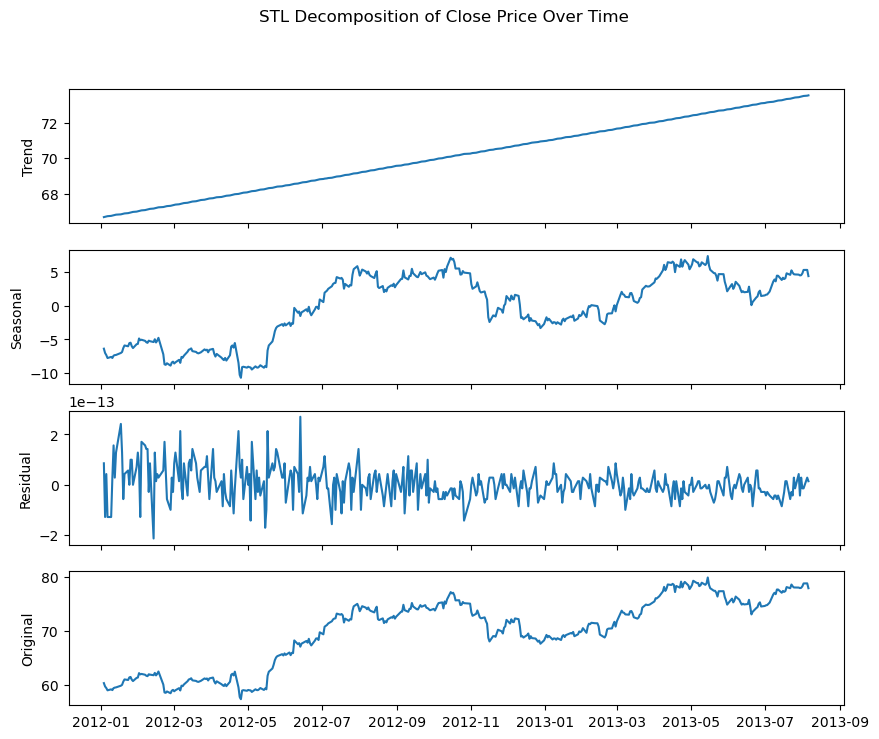

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set 'Date' as the index
train = train.set_index('Date')

# STL Decomposition dengan periode tertentu
stl_result = sm.tsa.STL(train['Close'], period=365).fit()

# Plot hasil STL Decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Plotting the components manually
axes[0].plot(stl_result.trend)
axes[0].set_ylabel('Trend')
axes[1].plot(stl_result.seasonal)
axes[1].set_ylabel('Seasonal')
axes[2].plot(stl_result.resid)
axes[2].set_ylabel('Residual')
axes[3].plot(train['Close'])
axes[3].set_ylabel('Original')

# Menambahkan judul dan label
plt.suptitle('STL Decomposition of Close Price Over Time')
plt.show()


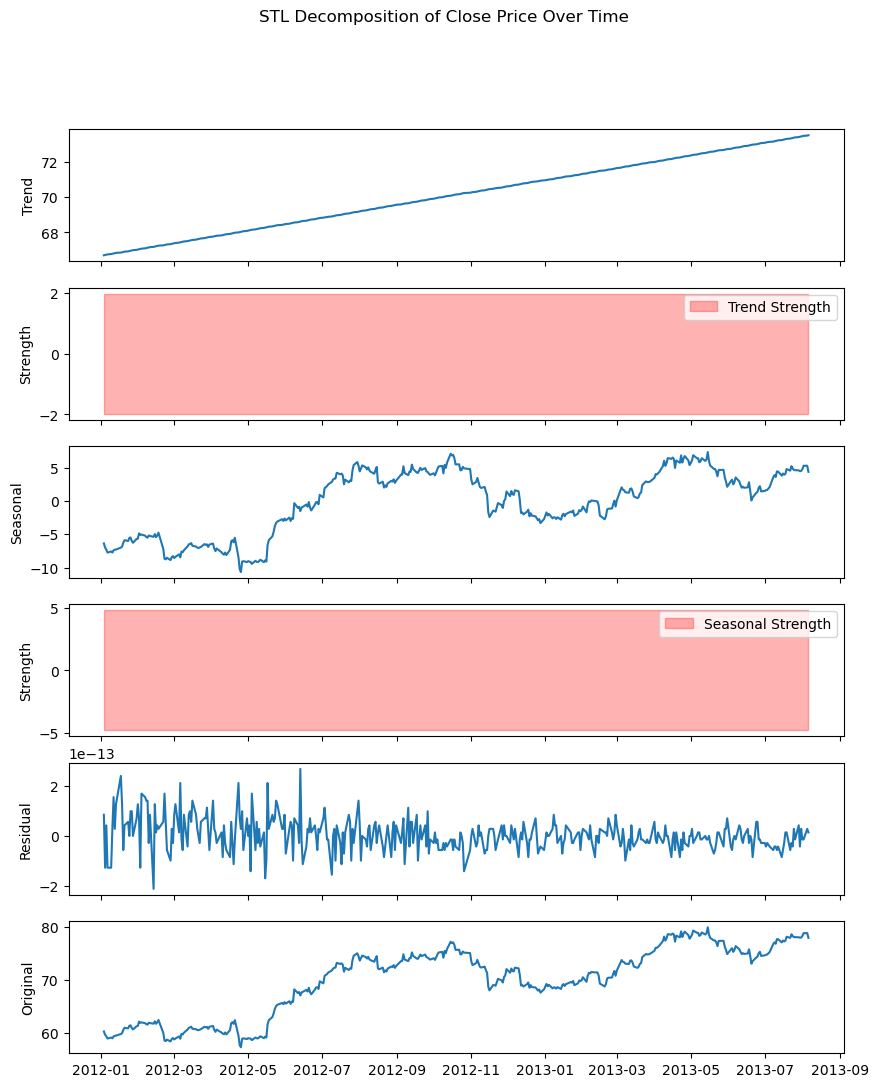

Trend Strength: 100.00%
Seasonal Strength: 39.00%


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# STL Decomposition with specified period
stl_result = sm.tsa.STL(train['Close'], period=365).fit()

# Calculate standard deviations for trend and seasonal components
trend_std = stl_result.trend.std()
seasonal_std = stl_result.seasonal.std()

# Calculate the trend strength (percentage of points outside the trend_std)
trend_strength = (abs(stl_result.trend) > trend_std).mean() * 100

# Calculate the seasonal strength (percentage of points outside the seasonal_std)
seasonal_strength = (abs(stl_result.seasonal) > seasonal_std).mean() * 100

# Plot hasil STL Decomposition
fig, axes = plt.subplots(6, 1, figsize=(10, 12), sharex=True)

# Plotting the components manually
axes[0].plot(stl_result.trend)
axes[0].set_ylabel('Trend')

axes[1].fill_between(stl_result.trend.index, -trend_std, trend_std, color='r', alpha=0.3, label='Trend Strength')
axes[1].legend()
axes[1].set_ylabel('Strength')

axes[2].plot(stl_result.seasonal)
axes[2].set_ylabel('Seasonal')

axes[3].fill_between(stl_result.seasonal.index, -seasonal_std, seasonal_std, color='r', alpha=0.3, label='Seasonal Strength')
axes[3].legend()
axes[3].set_ylabel('Strength')

axes[4].plot(stl_result.resid)
axes[4].set_ylabel('Residual')

axes[5].plot(train['Close'])
axes[5].set_ylabel('Original')

# Menambahkan judul dan label
plt.suptitle('STL Decomposition of Close Price Over Time')
plt.show()

# Print trend strength and seasonal strength
print(f'Trend Strength: {trend_strength:.2f}%')
print(f'Seasonal Strength: {seasonal_strength:.2f}%')


Data tidak stationer dan data cenderung memiliki pola Trend dibanding Seasonal

## Data Preprocessing

## Melakukan Differencing

Differencing adalah teknik dalam analisis time series yang digunakan untuk membuat data menjadi stasioner. Differencing melibatkan mengambil selisih antara nilai pada waktu tertentu dengan nilai pada waktu sebelumnya. Tujuannya adalah untuk menghilangkan tren atau pola waktu yang mungkin ada dalam data. Jika data awal memiliki tren atau komponen musiman, differencing dapat membantu menghasilkan data yang lebih stasioner.

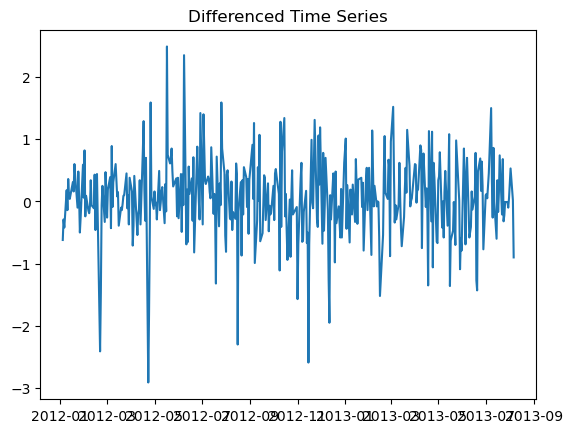

In [19]:
# Differencing data
train_diff = train['Close'].diff().dropna()

# melakuikan plot setelah melakukan differencing
plt.plot(train_diff.index, train_diff, label='Differenced')
plt.title('Differenced Time Series')
plt.show()

In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# cek stationarity kembali pasca melakukan differencing
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    
    if result[1] <= 0.05:
        print("Stationary (p-value <= 0.05)")
    else:
        print("Non-Stationary (p-value > 0.05)")

In [21]:
# cek stationarity kembali pasca melakukan differencing
test_stationarity(train_diff)

ADF Statistic: -19.455823726882
p-value: 0.0
Critical Values: {'1%': -3.4468876315017423, '5%': -2.868829424528516, '10%': -2.570653059771218}
Stationary (p-value <= 0.05)


data sudah terjadi stationary

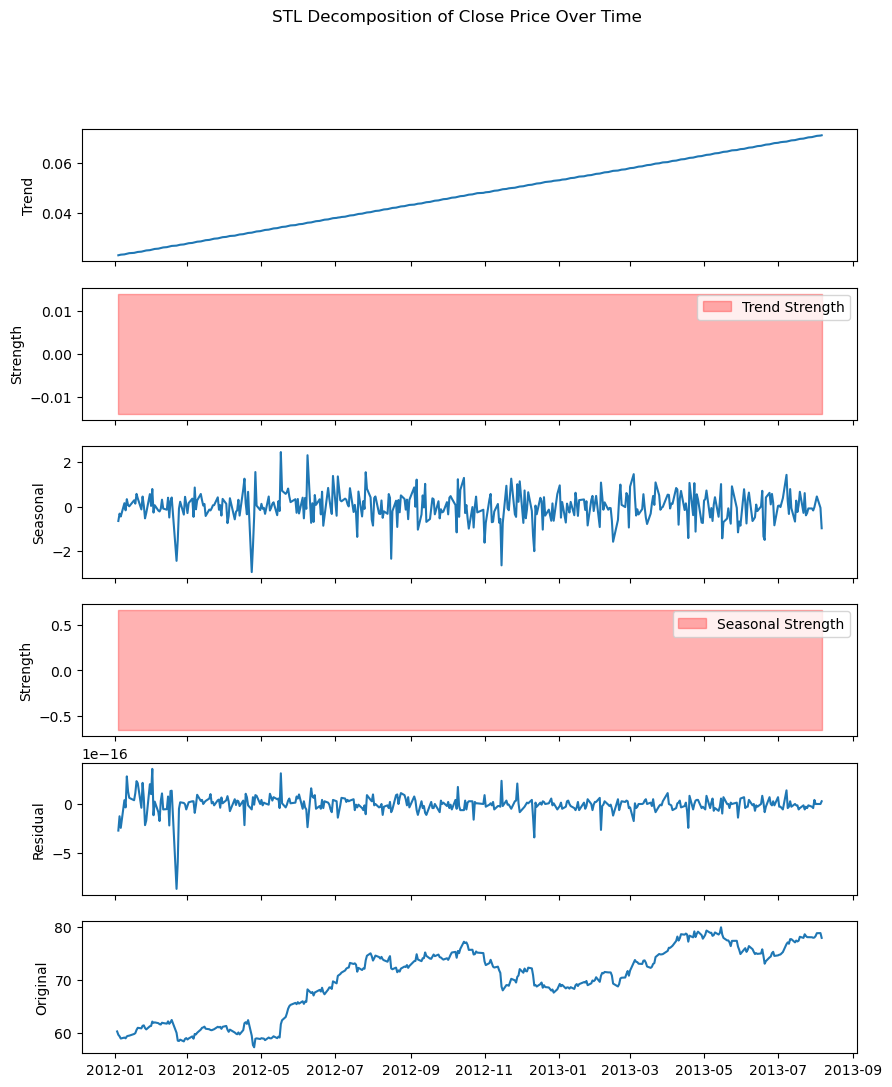

Trend Strength: 100.00%
Seasonal Strength: 24.81%


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#train = train.set_index('Date')

# STL Decomposition with specified period
stl_result = sm.tsa.STL(train_diff, period=365).fit()

# Calculate standard deviations for trend and seasonal components
trend_std = stl_result.trend.std()
seasonal_std = stl_result.seasonal.std()

# Calculate the trend strength (percentage of points outside the trend_std)
trend_strength = (abs(stl_result.trend) > trend_std).mean() * 100

# Calculate the seasonal strength (percentage of points outside the seasonal_std)
seasonal_strength = (abs(stl_result.seasonal) > seasonal_std).mean() * 100

# Plot hasil STL Decomposition
fig, axes = plt.subplots(6, 1, figsize=(10, 12), sharex=True)

# Plotting the components manually
axes[0].plot(stl_result.trend)
axes[0].set_ylabel('Trend')

axes[1].fill_between(stl_result.trend.index, -trend_std, trend_std, color='r', alpha=0.3, label='Trend Strength')
axes[1].legend()
axes[1].set_ylabel('Strength')

axes[2].plot(stl_result.seasonal)
axes[2].set_ylabel('Seasonal')

axes[3].fill_between(stl_result.seasonal.index, -seasonal_std, seasonal_std, color='r', alpha=0.3, label='Seasonal Strength')
axes[3].legend()
axes[3].set_ylabel('Strength')

axes[4].plot(stl_result.resid)
axes[4].set_ylabel('Residual')

axes[5].plot(train['Close'])
axes[5].set_ylabel('Original')

# Menambahkan judul dan label
plt.suptitle('STL Decomposition of Close Price Over Time')
plt.show()

# Print trend strength and seasonal strength
print(f'Trend Strength: {trend_strength:.2f}%')
print(f'Seasonal Strength: {seasonal_strength:.2f}%')


## Data Modeling dan Forecasting

## ARIMA

* `Autoregressive (AR):` Komponen ini mencerminkan pengaruh nilai-nilai sebelumnya pada nilai saat ini. Model AR mengukur sejauh mana nilai masa depan dipengaruhi oleh nilai-nilai masa lalu.

* `Integrated (I):` Tahap ini melibatkan proses differencing, yang digunakan untuk membuat data stasioner. Differencing melibatkan mengambil selisih antara nilai pada waktu tertentu dengan nilai pada waktu sebelumnya.

* `Moving Average (MA):` Komponen ini mengevaluasi pengaruh nilai-nilai sebelumnya terhadap nilai saat ini melalui model rata-rata bergerak. Model ini membantu menangkap pola pergerakan data dan menghilangkan fluktuasi acak.

In [23]:
train = train.reset_index()

In [24]:
test['Date'] = pd.to_datetime(test['Date'])

C:\Users\hp\AppData\Local\Temp\ipykernel_20004\4120622177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Date'] = pd.to_datetime(test['Date'])


In [25]:
train

,Date,index,Close
0,2012-01-03,0,60.330002
1,2012-01-04,1,59.709999
2,2012-01-05,2,59.419998
3,2012-01-06,3,59.000000
4,2012-01-09,4,59.180000
...,...,...,...
395,2013-07-31,395,77.940002
396,2013-08-01,396,78.220001
397,2013-08-02,397,78.750000
398,2013-08-05,398,78.769997


In [26]:
# Step 3: AutoARIMA
autoarima_model = auto_arima(train_diff, seasonal=False, suppress_warnings=True)
order = autoarima_model.order

# Fit ARIMA model with the best parameters
model = ARIMA(train_diff, order=order)
results = model.fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [27]:
autoarima_model

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAE: 3.78
RMSE: 4.17
MAPE: 5.08%


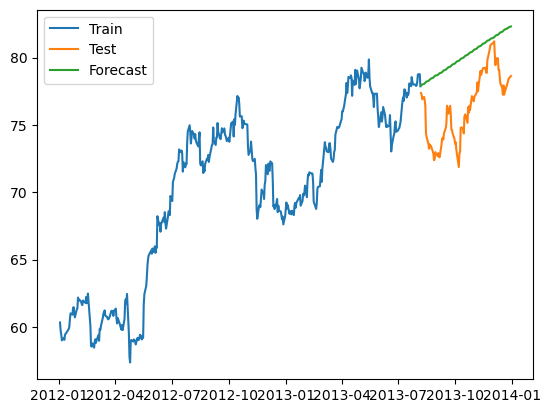

In [28]:
# Step 4: Inverse Differencing to get back the original scale
forecast_diff = results.forecast(steps=len(test))
forecast = np.cumsum(forecast_diff) + train['Close'].iloc[-1]  # Inverse differencing

# Calculate evaluation metrics
mae = mean_absolute_error(test['Close'], forecast)
mse = mean_squared_error(test['Close'], forecast)
rmse = np.sqrt(mse)
mape = (np.abs(forecast - test['Close']) / test['Close']).mean() * 100

# Display evaluation metrics
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plotting with the fit line
plt.plot(train['Date'], train['Close'], label='Train')
plt.plot(test['Date'], test['Close'], label='Test')
plt.plot(test['Date'], forecast, label='Forecast')
plt.legend()
plt.show()

# Holtwinter Exponential Smoothing

`Holt-Winters Exponential Smoothing` adalah metode peramalan time series yang memodelkan tren, musiman, dan komponen error dalam data. Berikut adalah penjelasan singkat tentang Holt-Winters Exponential Smoothing:

* `Tren (Trend):` Komponen tren memodelkan perubahan secara linear dari waktu ke waktu. Jika data menunjukkan peningkatan atau penurunan yang konsisten, komponen tren akan menangkap pola tersebut.

* `Musiman (Seasonal):` Komponen musiman menangkap pola perulangan atau siklus dalam data. Ini berguna ketika ada pola-pola yang berulang pada interval waktu tertentu, seperti musim atau bulanan.

* `Error (Residual):` Komponen error mencerminkan fluktuasi acak atau ketidakpastian yang tidak dapat dijelaskan oleh tren atau musiman. Ini mengukur sejauh mana model dapat memahami dan memprediksi variasi yang tidak terduga dalam data.

Metode ini menggunakan konstanta smoothing constants untuk memberikan bobot pada pengaruh dari masing-masing komponen. Ada tiga varian Holt-Winters Exponential Smoothing:

* `Additive:` Digunakan ketika variasi musiman konstan dari waktu ke waktu.
* `Multiplicative:` Digunakan ketika variasi musiman cenderung meningkat atau menurun seiring waktu.
* `Additive Damped:` Varian additive dengan damping untuk mengurangi dampak komponen musiman seiring berjalannya waktu.

## Menggunakan data asli

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# model_hw = ExponentialSmoothing(train['Close'], trend='mul', seasonal='mul', seasonal_periods=90)
# Membuat model Holt-Winters
model_hw = ExponentialSmoothing(train['Close'], trend='add', seasonal='add', seasonal_periods=90)
result_hw = model_hw.fit()

# Membuat prediksi
forecast_hw = result_hw.forecast(steps=len(test))

MAE: 4.08
RMSE: 4.48
MAPE: 5.41%


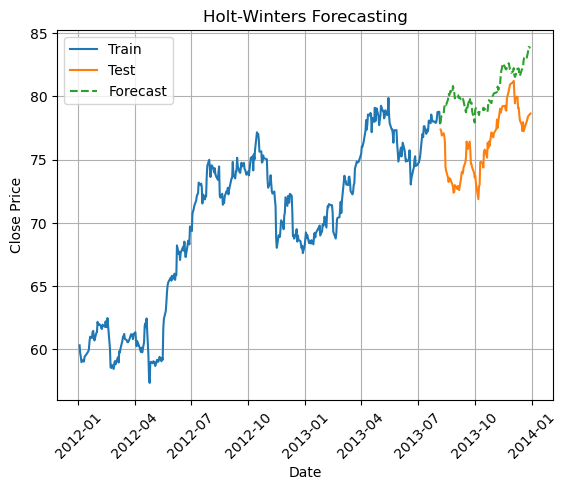

In [30]:
# Menghitung metrik evaluasi
mae_hw = mean_absolute_error(test['Close'], forecast_hw)
rmse_hw = np.sqrt(mean_squared_error(test['Close'], forecast_hw))
mape_hw = (np.abs(forecast_hw - test['Close']) / test['Close']).mean() * 100

# Menampilkan metrik evaluasi
print(f"MAE: {mae_hw:.2f}")
print(f"RMSE: {rmse_hw:.2f}")
print(f"MAPE: {mape_hw:.2f}%")

# Plotting data training
plt.plot(train['Date'], train['Close'], label='Train')

# Plotting data testing
plt.plot(test['Date'], test['Close'], label='Test')

# Plotting hasil forecasting
plt.plot(test['Date'], forecast_hw, label='Forecast', linestyle='dashed')

# Menambahkan judul dan label sumbu
plt.title('Holt-Winters Forecasting')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Menampilkan legenda
plt.legend()

# Menambahkan grid
plt.grid(True)

# Menambahkan rotasi pada label tanggal untuk menghindari tumpukan
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

### Mengunakan data hasil differencing

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAE: 76.32
RMSE: 76.36
MAPE: 99.98%


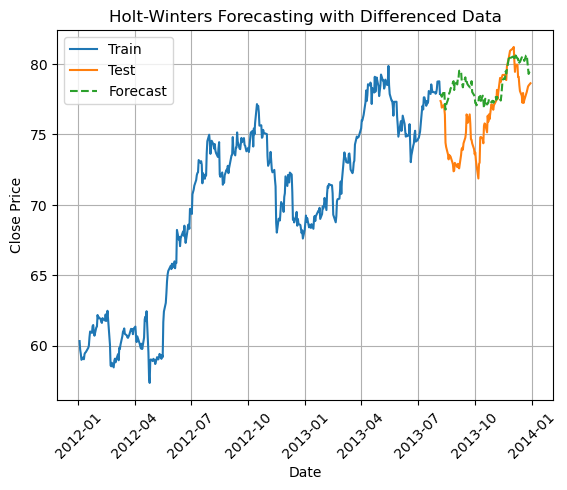

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Membuat model Holt-Winters
model_hw_diff = ExponentialSmoothing(train_diff, trend='add', seasonal='add', seasonal_periods=93)
result_hw_diff = model_hw_diff.fit()

# Membuat prediksi
forecast_hw_diff = result_hw_diff.forecast(steps=len(test))

# Menghitung metrik evaluasi
mae_hw_diff = mean_absolute_error(test['Close'], forecast_hw_diff)
rmse_hw_diff = np.sqrt(mean_squared_error(test['Close'], forecast_hw_diff))
mape_hw_diff = (np.abs(forecast_hw_diff - test['Close']) / test['Close']).mean() * 100

# Menampilkan metrik evaluasi
print(f"MAE: {mae_hw_diff:.2f}")
print(f"RMSE: {rmse_hw_diff:.2f}")
print(f"MAPE: {mape_hw_diff:.2f}%")

# Plotting data training
plt.plot(train['Date'], train['Close'], label='Train')

# Plotting data testing
plt.plot(test['Date'], test['Close'], label='Test')

# Plotting hasil forecasting
forecast_hw_diff_cumsum = np.cumsum(forecast_hw_diff) + train['Close'].iloc[-1]  # Inverse differencing
plt.plot(test['Date'], forecast_hw_diff_cumsum, label='Forecast', linestyle='dashed')

# Menambahkan judul dan label sumbu
plt.title('Holt-Winters Forecasting with Differenced Data')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Menampilkan legenda
plt.legend()

# Menambahkan grid
plt.grid(True)

# Menambahkan rotasi pada label tanggal untuk menghindari tumpukan
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

## FBProphet

* `Prophet` adalah metode peramalan time series yang dikembangkan oleh Facebook untuk memodelkan tren, musiman, dan efek liburan dalam data

* Model ini dapat menyesuaikan diri dengan data yang memiliki tingkat kompleksitas berbeda tanpa memerlukan banyak parameter atau penyesuaian manual. Selain itu, Prophet dapat menangani data yang hilang dan memiliki toleransi yang baik terhadap nilai outliers.

In [32]:
import pandas as pd
from prophet import Prophet

In [33]:
# Assuming df is your original dataframe
train = train.reset_index()[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"})

In [34]:
train

,ds,y
0,2012-01-03,60.330002
1,2012-01-04,59.709999
2,2012-01-05,59.419998
3,2012-01-06,59.000000
4,2012-01-09,59.180000
...,...,...
395,2013-07-31,77.940002
396,2013-08-01,78.220001
397,2013-08-02,78.750000
398,2013-08-05,78.769997


In [35]:
# Assuming df is your original dataframe
test = test.reset_index()[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"})

In [36]:
test

,ds,y
0,2013-08-07,77.370003
1,2013-08-08,77.250000
2,2013-08-09,76.900002
3,2013-08-12,77.080002
4,2013-08-13,76.860001
...,...,...
96,2013-12-23,77.870003
97,2013-12-24,78.010002
98,2013-12-26,78.389999
99,2013-12-27,78.470001


09:39:59 - cmdstanpy - INFO - Chain [1] start processing
09:39:59 - cmdstanpy - INFO - Chain [1] done processing


MAE: 2.20
RMSE: 2.56


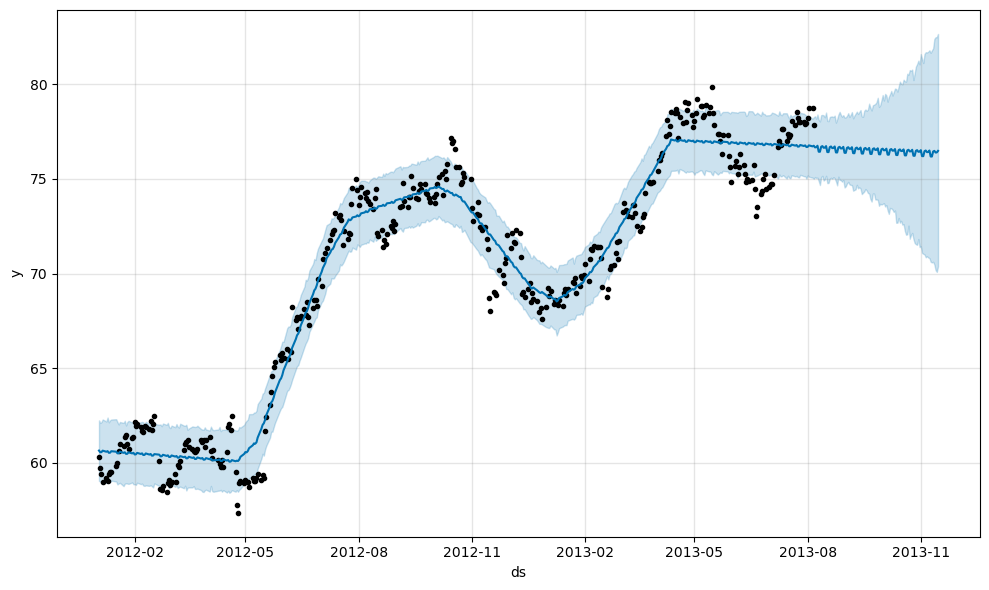

In [37]:
# Create and fit the model
model = Prophet()
model.fit(train)

# Create future dates for prediction
future_dates = model.make_future_dataframe(periods=len(test))

# Make predictions
forecast = model.predict(future_dates)

# Evaluate predictions on the test set
y_true = test['y']
y_pred = forecast['yhat'][-len(test):]

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)

# Print evaluation metrics
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plotting
fig = model.plot(forecast)

# Display the plot
plt.show()

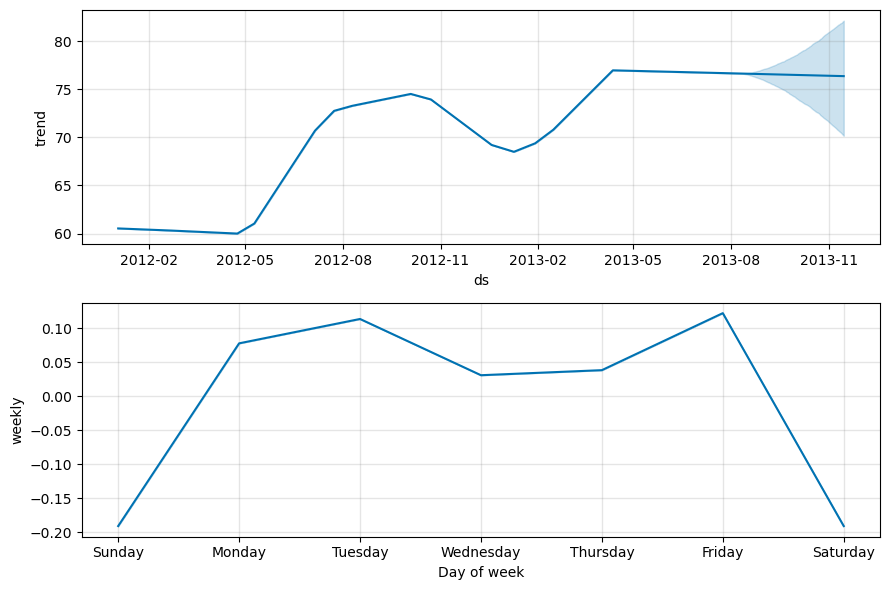

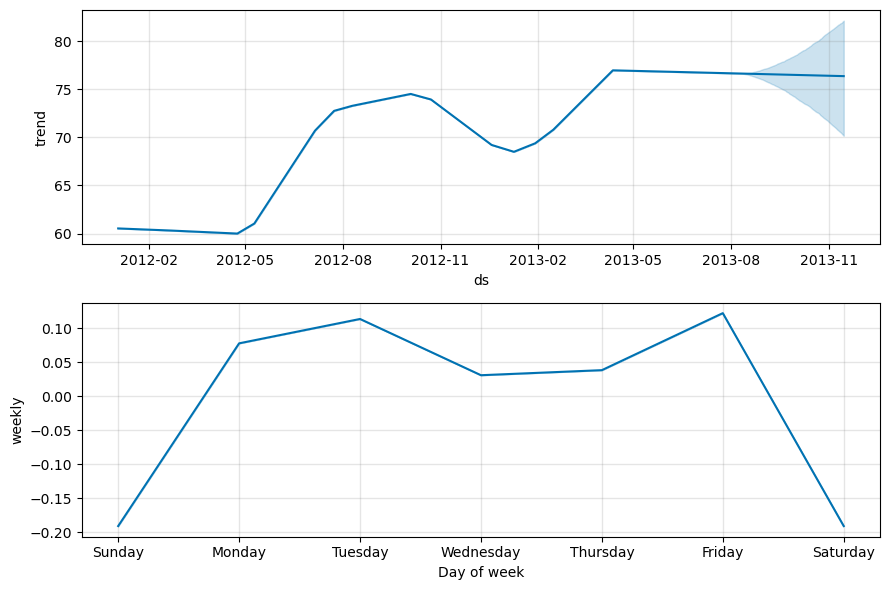

In [38]:
model.plot_components(forecast)

In [39]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation with initial 365 days for the first training data and the cut-off for every 180 days.

df_cv = cross_validation(model, initial='100 days', period='20 days', horizon = '365 days')

# Calculate evaluation metrics
res = performance_metrics(df_cv)

res

  0%|          | 0/6 [00:00<?, ?it/s]

09:40:03 - cmdstanpy - INFO - Chain [1] start processing
09:40:04 - cmdstanpy - INFO - Chain [1] done processing
09:40:04 - cmdstanpy - INFO - Chain [1] start processing
09:40:05 - cmdstanpy - INFO - Chain [1] done processing
09:40:06 - cmdstanpy - INFO - Chain [1] start processing
09:40:06 - cmdstanpy - INFO - Chain [1] done processing
09:40:07 - cmdstanpy - INFO - Chain [1] start processing
09:40:07 - cmdstanpy - INFO - Chain [1] done processing
09:40:07 - cmdstanpy - INFO - Chain [1] start processing
09:40:08 - cmdstanpy - INFO - Chain [1] done processing
09:40:08 - cmdstanpy - INFO - Chain [1] start processing
09:40:08 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,20.181077,4.492335,3.517377,0.050930,0.037640,0.051738,0.281879
1,37 days,21.289871,4.614095,3.654306,0.052870,0.038836,0.053671,0.268456
2,38 days,22.899211,4.785312,3.833331,0.055445,0.040532,0.056324,0.248322
3,39 days,24.287110,4.928195,3.972373,0.057417,0.042120,0.058396,0.241611
4,40 days,25.422651,5.042088,4.090853,0.059110,0.044258,0.060202,0.228188
...,...,...,...,...,...,...,...,...
325,361 days,2645.277590,51.432262,49.177131,0.641506,0.646219,0.533713,0.523490
326,362 days,2673.704285,51.707874,49.438057,0.644900,0.646219,0.536070,0.516779
327,363 days,2702.430018,51.984902,49.714132,0.648663,0.646219,0.538249,0.514094
328,364 days,2732.508726,52.273404,49.989557,0.652314,0.708209,0.539369,0.520805


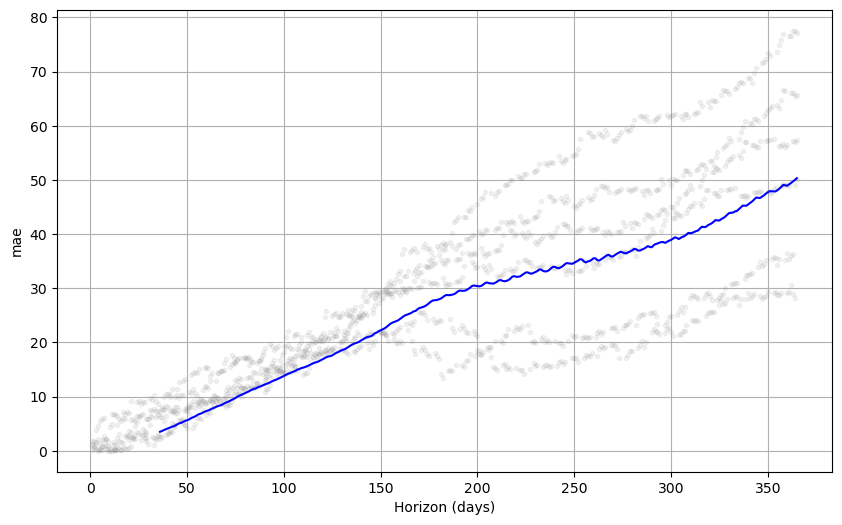

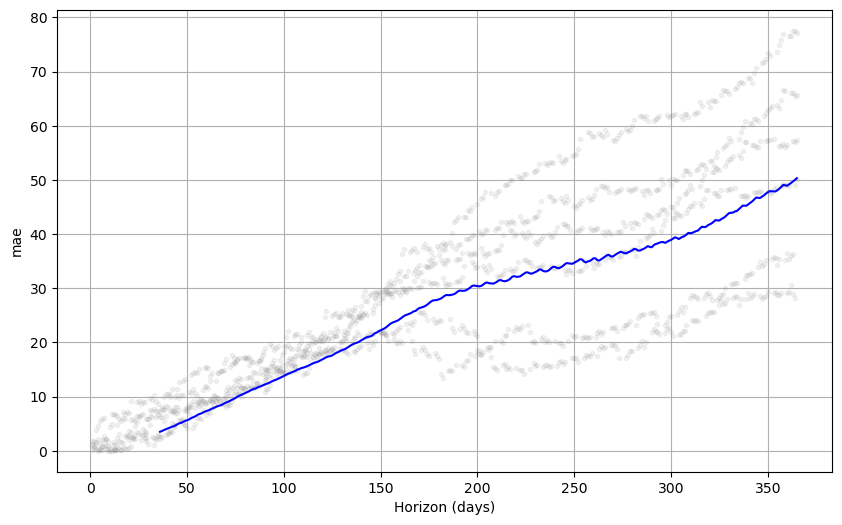

In [40]:
from prophet.plot import plot_cross_validation_metric
#choose between 'mse', 'rmse', 'mae', 'mape', 'coverage'

plot_cross_validation_metric(df_cv, metric= 'mae')

## Metode menggunakan Trend

- Double Moving Averages
- Damped Trend
- Brown satu parameter
- Pemodelan ARMA

In [41]:
# Assuming df is your original dataframe
train = train.reset_index()[["ds", "y"]].rename(columns={"ds": "Date", "y": "Close"})

In [42]:
# Assuming df is your original dataframe
test = test.reset_index()[["ds", "y"]].rename(columns={"ds": "Date", "y": "Close"})

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    400 non-null    datetime64[ns]
 1   Close   400 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.4 KB


## Double Moving Averages

`Metode Double Moving Averages` merupakan teknik sederhana dalam peramalan time series yang menggunakan dua tingkat pemulusan untuk menghasilkan prediksi. Langkah pertama melibatkan pemulusan rata-rata bergerak pada data asli untuk menangkap fluktuasi jangka pendek, sementara langkah kedua melibatkan pemulusan rata-rata bergerak pada hasil langkah pertama untuk menangkap tren jangka panjang. 

MAE: 3.78
RMSE: 4.17
MAPE: nan%


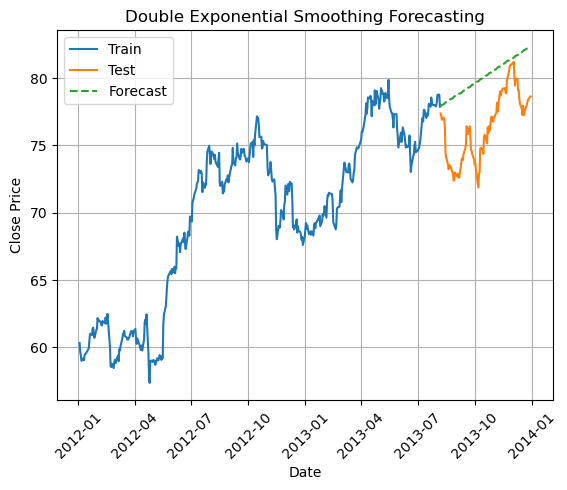

In [44]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Membuat model Double Exponential Smoothing
model_des = ExponentialSmoothing(train['Close'], trend='add', seasonal=None)
result_des = model_des.fit()

# Membuat prediksi
forecast_des = result_des.forecast(steps=len(test))

# Menghitung metrik evaluasi
mae_des = mean_absolute_error(test['Close'], forecast_des)
rmse_des = np.sqrt(mean_squared_error(test['Close'], forecast_des))
mape_des = (np.abs(forecast_des - test['Close']) / test['Close']).mean() * 100

# Menampilkan metrik evaluasi
print(f"MAE: {mae_des:.2f}")
print(f"RMSE: {rmse_des:.2f}")
print(f"MAPE: {mape_des:.2f}%")

# Plotting data training
plt.plot(train['Date'], train['Close'], label='Train')

# Plotting data testing
plt.plot(test['Date'], test['Close'], label='Test')

# Plotting hasil forecasting
plt.plot(test['Date'], forecast_des, label='Forecast', linestyle='dashed')

# Menambahkan judul dan label sumbu
plt.title('Double Exponential Smoothing Forecasting')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Menampilkan legenda
plt.legend()

# Menambahkan grid
plt.grid(True)

# Menambahkan rotasi pada label tanggal untuk menghindari tumpukan
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAE: 76.31
RMSE: 76.35
MAPE: nan%


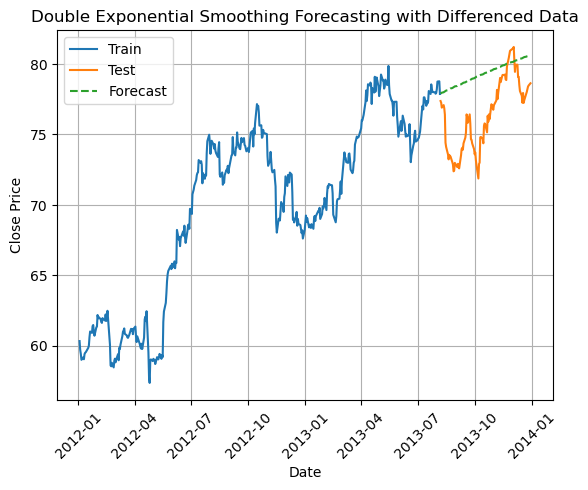

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Membuat model Double Exponential Smoothing dengan data yang telah didifferencing
model_des_diff = ExponentialSmoothing(train_diff, trend='add', seasonal=None)
result_des_diff = model_des_diff.fit()

# Membuat prediksi
forecast_des_diff = result_des_diff.forecast(steps=len(test))

# Menghitung metrik evaluasi
mae_des_diff = mean_absolute_error(test['Close'], forecast_des_diff)
rmse_des_diff = np.sqrt(mean_squared_error(test['Close'], forecast_des_diff))
mape_des_diff = (np.abs(forecast_des_diff - test['Close']) / test['Close']).mean() * 100

# Menampilkan metrik evaluasi
print(f"MAE: {mae_des_diff:.2f}")
print(f"RMSE: {rmse_des_diff:.2f}")
print(f"MAPE: {mape_des_diff:.2f}%")

# Plotting data training
plt.plot(train['Date'], train['Close'], label='Train')

# Plotting data testing
plt.plot(test['Date'], test['Close'], label='Test')

# Plotting hasil forecasting
forecast_des_diff_cumsum = np.cumsum(forecast_des_diff) + train['Close'].iloc[-1]  # Inverse differencing
plt.plot(test['Date'], forecast_des_diff_cumsum, label='Forecast', linestyle='dashed')

# Menambahkan judul dan label sumbu
plt.title('Double Exponential Smoothing Forecasting with Differenced Data')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Menampilkan legenda
plt.legend()

# Menambahkan grid
plt.grid(True)

# Menambahkan rotasi pada label tanggal untuk menghindari tumpukan
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


## Damped Trend

`Metode Damped Trend` dalam peramalan time series adalah pendekatan yang memperkenalkan faktor redaman atau damping ke dalam model peramalan untuk mengatasi ketidakpastian dalam tren jangka panjang. Faktor redaman ini membantu mengurangi dampak fluktuasi ekstrim pada nilai observasi sebelumnya, mengarah pada prediksi yang lebih stabil dan konservatif. 

C:\Users\hp\AppData\Local\Temp\ipykernel_20004\3057800200.py:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model_damped = ExponentialSmoothing(train['Close'], trend='add', seasonal=None, damped=True)


MAE: 2.52
RMSE: 3.07
MAPE: nan%


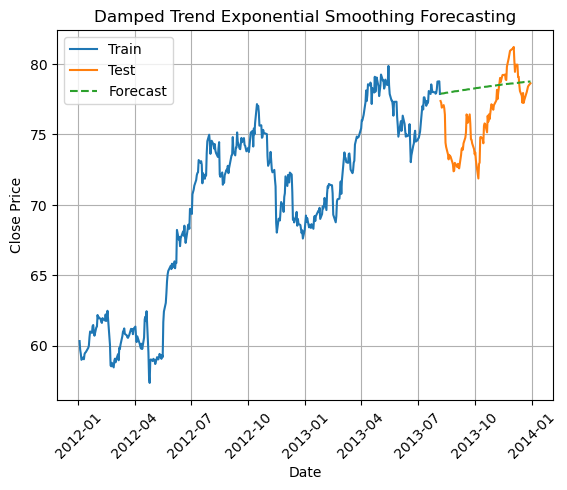

In [46]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Membuat model Damped Trend Exponential Smoothing
model_damped = ExponentialSmoothing(train['Close'], trend='add', seasonal=None, damped=True)
result_damped = model_damped.fit()

# Membuat prediksi
forecast_damped = result_damped.forecast(steps=len(test))

# Menghitung metrik evaluasi
mae_damped = mean_absolute_error(test['Close'], forecast_damped)
rmse_damped = np.sqrt(mean_squared_error(test['Close'], forecast_damped))
mape_damped = (np.abs(forecast_damped - test['Close']) / test['Close']).mean() * 100

# Menampilkan metrik evaluasi
print(f"MAE: {mae_damped:.2f}")
print(f"RMSE: {rmse_damped:.2f}")
print(f"MAPE: {mape_damped:.2f}%")

# Plotting data training
plt.plot(train['Date'], train['Close'], label='Train')

# Plotting data testing
plt.plot(test['Date'], test['Close'], label='Test')

# Plotting hasil forecasting
plt.plot(test['Date'], forecast_damped, label='Forecast', linestyle='dashed')

# Menambahkan judul dan label sumbu
plt.title('Damped Trend Exponential Smoothing Forecasting')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Menampilkan legenda
plt.legend()

# Menambahkan grid
plt.grid(True)

# Menambahkan rotasi pada label tanggal untuk menghindari tumpukan
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_20004\3138584106.py:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model_damped_diff = ExponentialSmoothing(train_diff, trend='add', seasonal=None, damped=True)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAE: 76.29
RMSE: 76.33
MAPE: nan%


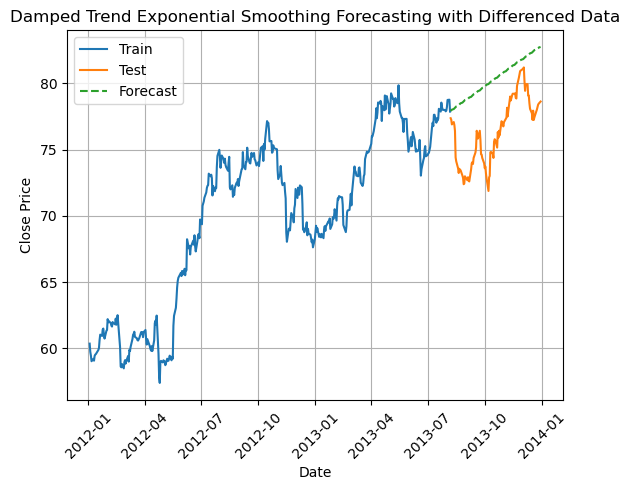

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Membuat model Damped Trend Exponential Smoothing dengan data yang telah didifferencing
model_damped_diff = ExponentialSmoothing(train_diff, trend='add', seasonal=None, damped=True)
result_damped_diff = model_damped_diff.fit()

# Membuat prediksi
forecast_damped_diff = result_damped_diff.forecast(steps=len(test))

# Menghitung metrik evaluasi
mae_damped_diff = mean_absolute_error(test['Close'], forecast_damped_diff)
rmse_damped_diff = np.sqrt(mean_squared_error(test['Close'], forecast_damped_diff))
mape_damped_diff = (np.abs(forecast_damped_diff - test['Close']) / test['Close']).mean() * 100

# Menampilkan metrik evaluasi
print(f"MAE: {mae_damped_diff:.2f}")
print(f"RMSE: {rmse_damped_diff:.2f}")
print(f"MAPE: {mape_damped_diff:.2f}%")

# Plotting data training
plt.plot(train['Date'], train['Close'], label='Train')

# Plotting data testing
plt.plot(test['Date'], test['Close'], label='Test')

# Plotting hasil forecasting
forecast_damped_diff_cumsum = np.cumsum(forecast_damped_diff) + train['Close'].iloc[-1]  # Inverse differencing
plt.plot(test['Date'], forecast_damped_diff_cumsum, label='Forecast', linestyle='dashed')

# Menambahkan judul dan label sumbu
plt.title('Damped Trend Exponential Smoothing Forecasting with Differenced Data')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Menampilkan legenda
plt.legend()

# Menambahkan grid
plt.grid(True)

# Menambahkan rotasi pada label tanggal untuk menghindari tumpukan
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


## Brown Satu Parameter

Metode Brown Satu Parameter, juga dikenal sebagai Simple Exponential Smoothing, adalah teknik peramalan time series yang memberikan penekanan pada pengaruh observasi terbaru dalam membuat prediksi. Dengan memperkenalkan satu parameter peluruhan (damping factor), metode ini memberikan bobot berlebih pada data terbaru dibandingkan data historis, menjadikannya cocok untuk data yang mengandung tren atau fluktuasi jangka pendek. Meskipun sederhana, Brown Satu Parameter dapat efektif dalam menghasilkan prediksi yang responsif terhadap perubahan terbaru dalam data, meskipun dapat kurang akurat dalam mengantisipasi perubahan tren jangka panjang

C:\Users\hp\AppData\Local\Temp\ipykernel_20004\3697370427.py:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model_brown = ExponentialSmoothing(train['Close'], trend='add', seasonal=None, damped=False)


MAE: 3.78
RMSE: 4.17
MAPE: nan%


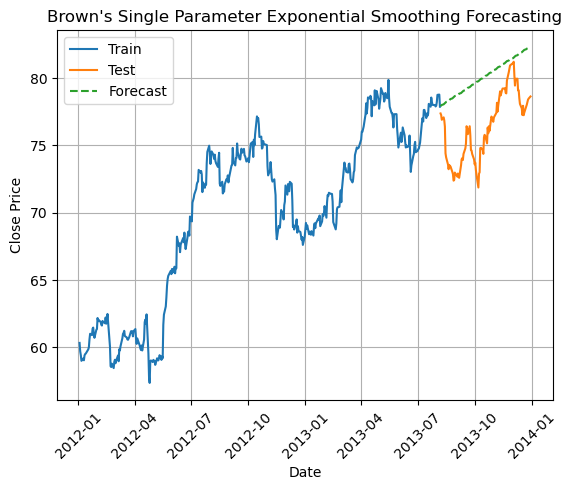

In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Membuat model Brown's Exponential Smoothing
model_brown = ExponentialSmoothing(train['Close'], trend='add', seasonal=None, damped=False)
result_brown = model_brown.fit()

# Membuat prediksi
forecast_brown = result_brown.forecast(steps=len(test))

# Menghitung metrik evaluasi
mae_brown = mean_absolute_error(test['Close'], forecast_brown)
rmse_brown = np.sqrt(mean_squared_error(test['Close'], forecast_brown))
mape_brown = (np.abs(forecast_brown - test['Close']) / test['Close']).mean() * 100

# Menampilkan metrik evaluasi
print(f"MAE: {mae_brown:.2f}")
print(f"RMSE: {rmse_brown:.2f}")
print(f"MAPE: {mape_brown:.2f}%")

# Plotting data training
plt.plot(train['Date'], train['Close'], label='Train')

# Plotting data testing
plt.plot(test['Date'], test['Close'], label='Test')

# Plotting hasil forecasting
plt.plot(test['Date'], forecast_brown, label='Forecast', linestyle='dashed')

# Menambahkan judul dan label sumbu
plt.title("Brown's Single Parameter Exponential Smoothing Forecasting")
plt.xlabel('Date')
plt.ylabel('Close Price')

# Menampilkan legenda
plt.legend()

# Menambahkan grid
plt.grid(True)

# Menambahkan rotasi pada label tanggal untuk menghindari tumpukan
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_20004\3341088915.py:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model_brown_diff = ExponentialSmoothing(train_diff, trend='add', seasonal=None, damped=False)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAE: 76.31
RMSE: 76.35
MAPE: nan%


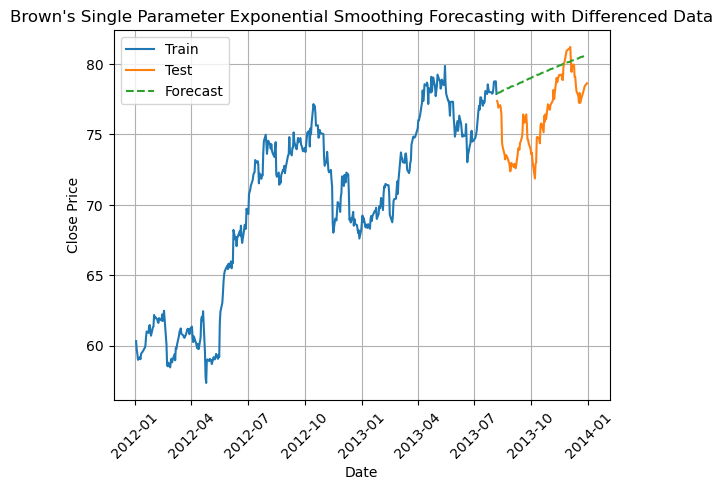

In [49]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Membuat model Brown's Exponential Smoothing dengan data yang telah didifferencing
model_brown_diff = ExponentialSmoothing(train_diff, trend='add', seasonal=None, damped=False)
result_brown_diff = model_brown_diff.fit()

# Membuat prediksi
forecast_brown_diff = result_brown_diff.forecast(steps=len(test))

# Menghitung metrik evaluasi
mae_brown_diff = mean_absolute_error(test['Close'], forecast_brown_diff)
rmse_brown_diff = np.sqrt(mean_squared_error(test['Close'], forecast_brown_diff))
mape_brown_diff = (np.abs(forecast_brown_diff - test['Close']) / test['Close']).mean() * 100

# Menampilkan metrik evaluasi
print(f"MAE: {mae_brown_diff:.2f}")
print(f"RMSE: {rmse_brown_diff:.2f}")
print(f"MAPE: {mape_brown_diff:.2f}%")

# Plotting data training
plt.plot(train['Date'], train['Close'], label='Train')

# Plotting data testing
plt.plot(test['Date'], test['Close'], label='Test')

# Plotting hasil forecasting
forecast_brown_diff_cumsum = np.cumsum(forecast_brown_diff) + train['Close'].iloc[-1]  # Inverse differencing
plt.plot(test['Date'], forecast_brown_diff_cumsum, label='Forecast', linestyle='dashed')

# Menambahkan judul dan label sumbu
plt.title("Brown's Single Parameter Exponential Smoothing Forecasting with Differenced Data")
plt.xlabel('Date')
plt.ylabel('Close Price')

# Menampilkan legenda
plt.legend()

# Menambahkan grid
plt.grid(True)

# Menambahkan rotasi pada label tanggal untuk menghindari tumpukan
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


## ARMA

Metode ARMA (AutoRegressive Moving Average) adalah pendekatan populer dalam analisis time series untuk memodelkan dan meramalkan data dengan memadukan elemen autoregressive (AR) dan moving average (MA

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAE: 76.29
RMSE: 76.33
MAPE: nan%


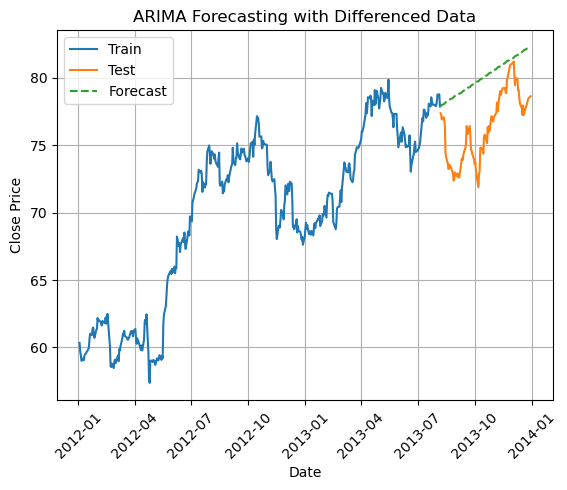

In [50]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Specify the order for the ARIMA model (p, d, q)
order_arma = (1, 0, 1)  # Replace p, d, and q with appropriate values
model_arma_diff = ARIMA(train_diff, order=order_arma)
result_arma_diff = model_arma_diff.fit()

# Make predictions
forecast_arma_diff = result_arma_diff.predict(start=len(train_diff), end=len(train_diff) + len(test) - 1, typ='levels')

# Calculate evaluation metrics
mae_arma_diff = mean_absolute_error(test['Close'], forecast_arma_diff)
rmse_arma_diff = np.sqrt(mean_squared_error(test['Close'], forecast_arma_diff))
mape_arma_diff = (np.abs(forecast_arma_diff - test['Close']) / test['Close']).mean() * 100

# Display evaluation metrics
print(f"MAE: {mae_arma_diff:.2f}")
print(f"RMSE: {rmse_arma_diff:.2f}")
print(f"MAPE: {mape_arma_diff:.2f}%")

# Plotting data training
plt.plot(train['Date'], train['Close'], label='Train')

# Plotting data testing
plt.plot(test['Date'], test['Close'], label='Test')

# Plotting forecast
forecast_arma_diff_cumsum = np.cumsum(forecast_arma_diff) + train['Close'].iloc[-1]  # Inverse differencing
plt.plot(test['Date'], forecast_arma_diff_cumsum, label='Forecast', linestyle='dashed')

# Add title and labels
plt.title('ARIMA Forecasting with Differenced Data')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Show legend
plt.legend()

# Add grid
plt.grid(True)

# Rotate date labels to prevent overlap
plt.xticks(rotation=45)

# Show plot
plt.show()


# Kesimpulan

Dari eksperimentasi model antara ARIMA, ARMA, Damped trend, Holtwinter Exponential Smoothing, FBProphet, Double Moving Averages
,Brown satu parameter, dan Pemodelan ARMA jika dibandingkan metrics MAE, maka model FBprophet memiliki MAE yang cukup baik untuk memprediksi kasus kali ini yakni dengan MAE sebesar `MAE: 2.20`

# Further Research

* Dapat dicoba dengan menambahkan variabel lain, misalnya suku bunga acuan, ihk, inflasi, kurs, dan saham dengan satu bidang atau sektor serta variabel lainnya untuk membantu memprediksi harga saham tersebut
* kalau data tambahan diatas sudah tersedia bisa dibuatkan lagged terlebih dahulu lalu bisa dilanjutkan dengan model ARIMA bahkan dapat juga dicoba untuk menggunakan model LSTM dan GRU
* bisa juga ditambahkan dengan metode lain seperti ARCH karena Karena bisa jadi LM test signifikan pada lag-lag awal (short memory)
